In [57]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [139]:
# Load an image from file
image_path = '../Datasets/Image-Data/20211230142000_11_NE.jpg'
image_path = '../Datasets/Image-Data/20211229105000_11_NE.jpg'

image = cv2.imread(image_path)

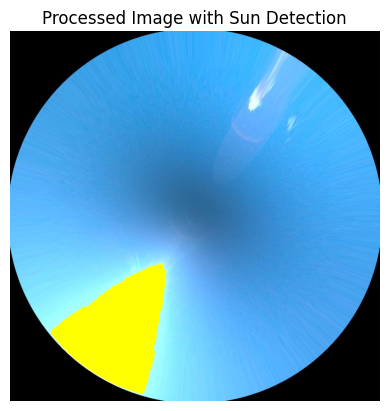

In [140]:
if image is None:
    print("Error: Unable to load the image.")
    exit()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Apply GaussianBlur to reduce noise and help with contour detection
blurred = cv2.GaussianBlur(gray, (15, 15), 0)  # kernel size

# Use adaptive thresholding to create a binary image
_, thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and find the contour with the largest area (assumed to be the sun)
largest_contour = max(contours, key=cv2.contourArea)

# Draw a yellow circle around the sun
cv2.drawContours(image, [largest_contour], -1, (0, 255, 255), -1)

# Display the result using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Processed Image with Sun Detection')
plt.axis('off')
plt.show()

In [141]:
# Check if the image was loaded successfully
max_th = 0
min_th = float('inf')
th_arr = []
if image is None:
    print("Error: Unable to load the image.")
    exit()

# Get image dimensions
height, width, _ = image.shape

center_x, center_y = width // 2, height // 2
radius = height // 2

# Create an empty output image
output_image = np.zeros_like(image)

# Iterate through each pixel in the image
for y in range(height):
    for x in range(width):
        # Get blue, green, and red intensity values for the current pixel
        b = float(image[y, x, 0])
        g = float(image[y, x, 1])
        r = float(image[y, x, 2])

        distance_to_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)

        # Avoid division by zero by adding a small epsilon value
        epsilon = 1e-5

        # Calculate the threshold value for the current pixel
        threshold = (b / (r + epsilon)) + (b / (g + epsilon))

        if b == 0 and r == 0 and g == 0: # Outside the circle
            threshold = 0
        if b == 0 and r == 255 and g == 255: # Sun
            threshold = -1

        # Define the threshold value
        threshold_value = 3.0  # You may adjust this value based on your image characteristics

        # Classify the pixel based on the threshold
        if radius < distance_to_center:
            output_image[y, x, :] = [0, 0, 0]
        elif threshold < 0:
            output_image[y, x, :] = [0, 255, 255]
        else:
            th_arr.append(threshold)
            if threshold > threshold_value:
                # Pixel is above the threshold, set it to blue
                output_image[y, x, :] = [255, 0, 0]
            else:
                # Pixel is below the threshold, set it to grey
                output_image[y, x, :] = [128, 128, 128]

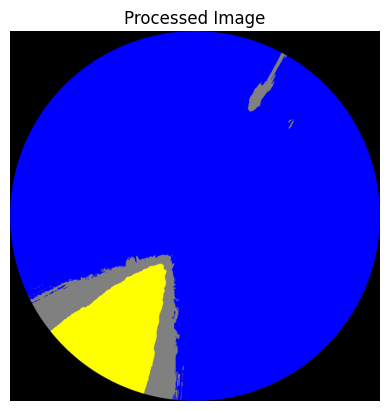

In [142]:
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')
plt.axis('off')
plt.show()

In [157]:
def find_sun(image):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load the image.")
        exit()

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    # Apply GaussianBlur to reduce noise and help with contour detection
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)  # kernel size

    # Use adaptive thresholding to create a binary image
    _, thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Iterate through the contours and find the contour with the largest area (assumed to be the sun)
        largest_contour = max(contours, key=cv2.contourArea)

        # Draw a yellow circle around the sun
        cv2.drawContours(image, [largest_contour], -1, (0, 255, 255), -1)

    # Display the result using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image with Sun Detection')
    plt.axis('off')
    plt.show()

    return image

In [158]:
def BRBG_segmentation(image):
    sun_image = find_sun(image)
    # Check if the image was loaded successfully
    max_th = 0
    min_th = float('inf')
    th_arr = []
    if sun_image is None:
        print("Error: Unable to load the image.")
        exit()

    # Get image dimensions
    height, width, _ = sun_image.shape

    center_x, center_y = width // 2, height // 2
    radius = height // 2

    # Create an empty output image
    output_image = np.zeros_like(sun_image)

    # Iterate through each pixel in the image
    for y in range(height):
        for x in range(width):
            # Get blue, green, and red intensity values for the current pixel
            b = float(sun_image[y, x, 0])
            g = float(sun_image[y, x, 1])
            r = float(sun_image[y, x, 2])

            distance_to_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)

            # Avoid division by zero by adding a small epsilon value
            epsilon = 1e-5

            # Calculate the threshold value for the current pixel
            threshold = (b / (r + epsilon)) + (b / (g + epsilon))

            if b == 0 and r == 0 and g == 0: # Outside the circle
                threshold = 0
            if b == 0 and r == 255 and g == 255: # Sun
                threshold = -1

            # Define the threshold value
            threshold_value = 2.7  # You may adjust this value based on your image characteristics

            # Classify the pixel based on the threshold
            if radius < distance_to_center:
                output_image[y, x, :] = [0, 0, 0]
            elif threshold < 0:
                output_image[y, x, :] = [0, 255, 255]
            else:
                th_arr.append(threshold)
                if threshold > threshold_value:
                    # Pixel is above the threshold, set it to blue
                    output_image[y, x, :] = [255, 0, 0]
                else:
                    # Pixel is below the threshold, set it to grey
                    output_image[y, x, :] = [128, 128, 128]

    return output_image

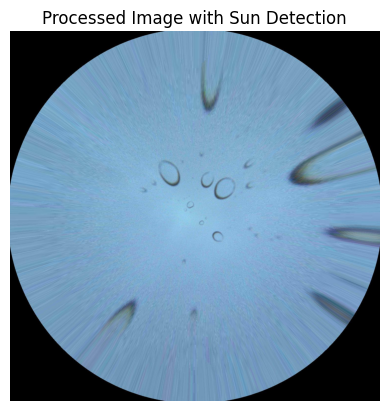

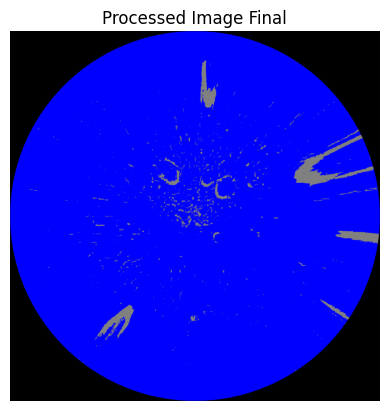

In [161]:
# Load an image from file
image_path = '../Datasets/Image-Data/20211230142000_11_NE.jpg'
image_path = '../Datasets/Image-Data/20211229105000_11_NE.jpg'
image_path = '../Datasets/Image-Data/20211231163000_12_UE.jpg'

output_image = BRBG_segmentation(image_path)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Processed Image Final')
plt.axis('off')
plt.show()